**Data Collection and Preprocessing:**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Data Understanding:**

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


**Data Cleaning and Preparation:**

In [4]:
# Handling missing values
data.dropna(inplace=True)

In [5]:
# Removing outliers
# Define a function to detect outliers using z-score
def detect_outliers(df, col):
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    return df[abs(z_scores) < 3]

In [6]:
#Removing outliers in Global_Sales column
data = data[data['Global_Sales'] < data['Global_Sales'].quantile(0.99)]

In [7]:
#Convert Year to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [8]:
print(data['Year'].info())

<class 'pandas.core.series.Series'>
Int64Index: 16128 entries, 163 to 16597
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
16128 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 252.0 KB
None


In [9]:
# Apply outlier detection for sales columns
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    data = detect_outliers(data, col)

**Descriptive Analysis:**

In [10]:
# Summary statistics
print(data.describe())

               Rank      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  14598.000000  14598.000000  14598.000000  14598.000000  14598.000000   
mean    9141.011851      0.128156      0.061558      0.037305      0.019860   
std     4313.324812      0.175197      0.102637      0.088822      0.032281   
min     1484.000000      0.000000      0.000000      0.000000      0.000000   
25%     5426.250000      0.000000      0.000000      0.000000      0.000000   
50%     9157.500000      0.060000      0.020000      0.000000      0.010000   
75%    12871.750000      0.180000      0.070000      0.030000      0.020000   
max    16600.000000      1.220000      0.730000      0.630000      0.220000   

       Global_Sales  
count  14598.000000  
mean       0.247189  
std        0.273519  
min        0.010000  
25%        0.050000  
50%        0.140000  
75%        0.340000  
max        1.320000  


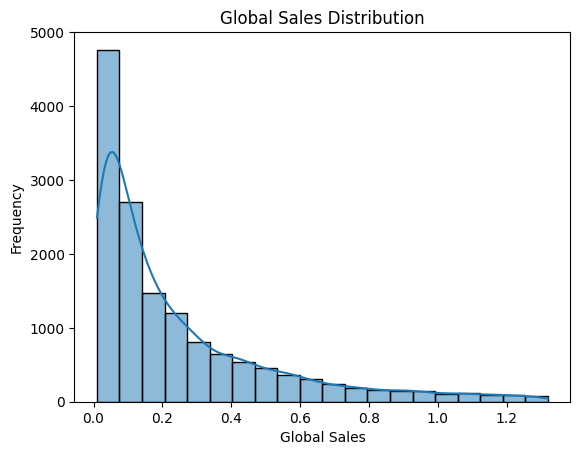

In [11]:
# Visualize data distributions
sns.histplot(data['Global_Sales'], bins=20, kde=True)
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

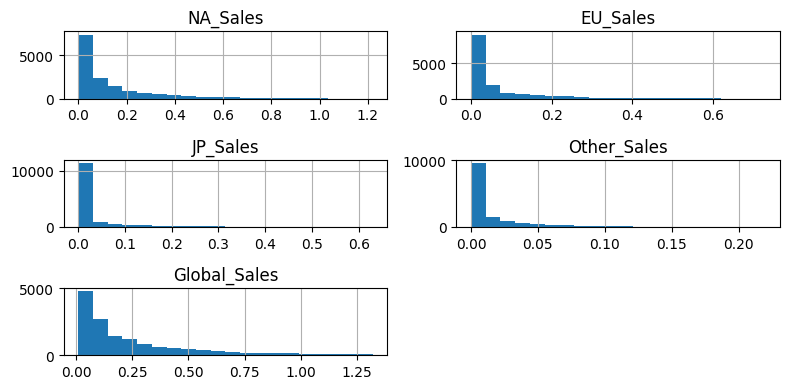

In [12]:
# Visualize data distributions
data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].hist(bins=20, figsize=(8, 4))
plt.tight_layout()
plt.show()

**Segmentation and Profiling:**

In [13]:
#segmenting by Genre
genre_groups = data.groupby('Genre')
for genre, group_data in genre_groups:
    print(f"Genre: {genre}")
    print(group_data.describe())

Genre: Action
               Rank     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count   2924.000000  2924.000000  2924.000000  2924.000000  2924.000000   
mean    8774.075581     0.139733     0.073399     0.028782     0.023697   
std     4295.772132     0.170342     0.108401     0.073346     0.035925   
min     1484.000000     0.000000     0.000000     0.000000     0.000000   
25%     5058.500000     0.010000     0.000000     0.000000     0.000000   
50%     8508.500000     0.080000     0.030000     0.000000     0.010000   
75%    12448.500000     0.200000     0.100000     0.020000     0.030000   
max    16592.000000     1.120000     0.640000     0.620000     0.220000   

       Global_Sales  
count   2924.000000  
mean       0.265944  
std        0.281355  
min        0.010000  
25%        0.060000  
50%        0.160000  
75%        0.380000  
max        1.320000  
Genre: Adventure
               Rank     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count   1242.000000 

**Correlation and Trends:**

In [14]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                  Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000 -0.732888 -0.629139 -0.248371    -0.656816   
NA_Sales     -0.732888  1.000000  0.513408 -0.118101     0.593643   
EU_Sales     -0.629139  0.513408  1.000000 -0.087906     0.780590   
JP_Sales     -0.248371 -0.118101 -0.087906  1.000000    -0.050698   
Other_Sales  -0.656816  0.593643  0.780590 -0.050698     1.000000   
Global_Sales -0.862347  0.864086  0.767183  0.209550     0.773436   

              Global_Sales  
Rank             -0.862347  
NA_Sales          0.864086  
EU_Sales          0.767183  
JP_Sales          0.209550  
Other_Sales       0.773436  
Global_Sales      1.000000  


<ipython-input-14-dd3106a641cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


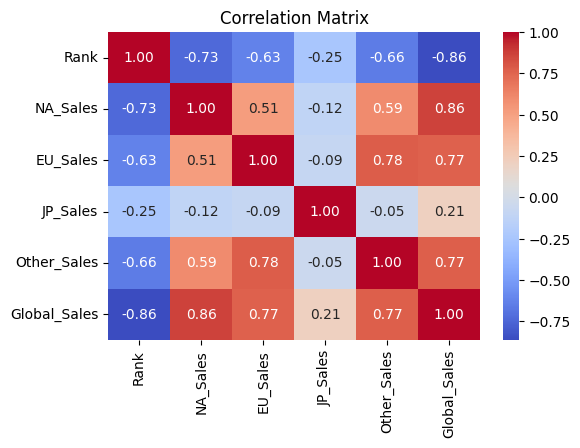

In [15]:
# Visualize correlations
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()